In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('loan prediction status.csv')

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


dataset show 

In [6]:
df.shape

(614, 13)

there should be 614 row and 13 columns

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

there are many object type value

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

THERE are many missing values present in dataset

# understaning the various features of the dataset

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


for non numerical value we can look at frequency distribution

In [10]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 understanding  distribution of numerical variables

applicant income

loan amount

# OUTliers

<AxesSubplot:>

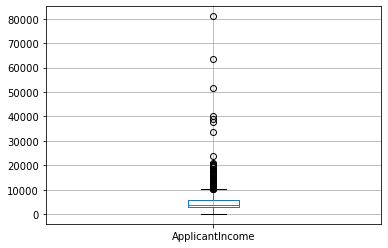

In [11]:
df.boxplot(column='ApplicantIncome')

lots of outlier present in applicant income

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

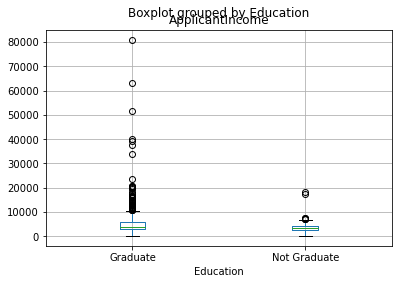

In [12]:
df.boxplot(column='ApplicantIncome',by='Education')

Outliers present in  education

<AxesSubplot:>

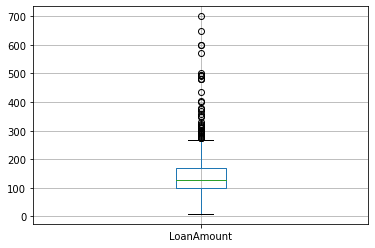

In [13]:
df.boxplot(column='LoanAmount')

outliers present

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

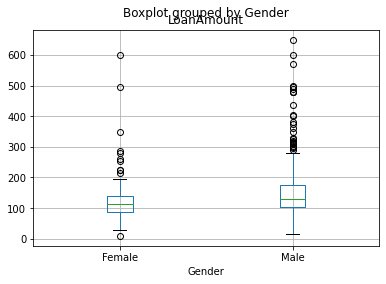

In [14]:
df.boxplot(column='LoanAmount',by='Gender')

loan amount is missing as wellas extreme values, while applicant income has few extreme value

# understanding distribution of categorical variable

In [21]:
loan_approval=df['Loan_Status'].value_counts()['Y']


In [22]:
loan_approval

422

42 numer of loan approved

In [23]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [24]:
def percentageConvert(ser):
    return ser/flot(ser[-1])

79.58 of the applicant whose loan approved have credit history equals to 1

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df['Self_Employed'].fillna('No',inplace=True)

# Outliers of loan amount and applicant income

<AxesSubplot:>

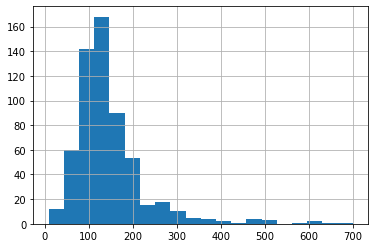

In [27]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

df['LoanAmount'].hist(bins=20)

extreme values are practically possiable i.e some people might apply for high values of loan due to specific need so instent triting there ouliers

# Data Prepration for model building

In [31]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le=preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status           object
TotalIncome          float64
dtype: object

# Model Building

In [32]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [33]:
id_col=['Loan_ID']
targel_col=['Loan_Status']
cat_cols=['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [34]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [54]:
from sklearn.model_selection import train_test_split

In [53]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=43)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [57]:
LE=LabelEncoder()
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,2900.0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,4106.0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,8312.0
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,7583.0


In [49]:
LE=LabelEncoder()
df['Loan_ID']=LE.fit_transform(df['Loan_ID'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,2900.0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,4106.0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,8312.0
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,7583.0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=43)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [62]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,2900.0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,4106.0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,8312.0
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,7583.0


In [63]:
lr=LogisticRegression(C=100,max_iter=10000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#lr.score()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8177339901477833
              precision    recall  f1-score   support

           0       0.94      0.46      0.62        65
           1       0.80      0.99      0.88       138

    accuracy                           0.82       203
   macro avg       0.87      0.72      0.75       203
weighted avg       0.84      0.82      0.80       203



# the acurracy level is 81 for logistic regression